In [1]:
import yfinance as yf
import pandas as pd

# Symbols for your portfolio
symbols = ['NFLX','SPY']

# Fetch historical stock data for each symbol
data = {symbol: yf.download(symbol, start="2023-10-31", end="2024-10-31") for symbol in symbols}

# Initialize an empty dictionary to store 'Adj Close' series
adj_close_data = {}

# Extract 'Adj Close' prices for each symbol
for symbol, df in data.items():
    if isinstance(df, pd.DataFrame) and 'Adj Close' in df.columns:
        adj_close_data[symbol] = df['Adj Close']

# Combine the 'Adj Close' data into a single DataFrame
price_data = pd.concat(adj_close_data.values(), axis=1, keys=adj_close_data.keys())

# Drop rows with missing values (if any)
price_data.dropna(inplace=True)

# Display the combined data
print(price_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  NFLX         SPY
Ticker            NFLX         SPY
Date                              
2023-10-31  411.690002  412.620331
2023-11-01  420.190002  417.020813
2023-11-02  424.709991  425.012756
2023-11-03  432.359985  428.890320
2023-11-06  434.739990  429.876984


In [2]:
data

{'AAPL': Price        Adj Close       Close        High         Low        Open  \
 Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
 Date                                                                     
 2023-10-31  169.713882  170.770004  170.899994  167.899994  169.350006   
 2023-11-01  172.894104  173.970001  174.229996  170.119995  171.000000   
 2023-11-02  176.471817  177.570007  177.779999  175.460007  175.520004   
 2023-11-03  175.557526  176.649994  176.820007  173.350006  174.240005   
 2023-11-06  178.121567  179.229996  179.429993  176.210007  176.380005   
 ...                ...         ...         ...         ...         ...   
 2024-10-24  230.316620  230.570007  230.820007  228.410004  229.979996   
 2024-10-25  231.155685  231.410004  233.220001  229.570007  229.740005   
 2024-10-28  233.143494  233.399994  234.729996  232.550003  233.320007   
 2024-10-29  233.413193  233.669998  234.330002  232.320007  233.100006   
 2024-10-30  229.

In [2]:
price_data.values

array([[169.71388245,  64.02307892],
       [172.894104  ,  64.96284485],
       [176.47183228,  65.8234787 ],
       [175.55751038,  66.83248901],
       [178.12155151,  66.65442657],
       [180.69555664,  67.01055145],
       [181.75894165,  66.69400787],
       [181.28189087,  66.67422485],
       [185.49127197,  67.7326889 ],
       [183.89906311,  67.58430481],
       [186.5262146 ,  68.68235779],
       [187.09342957,  69.01869202],
       [188.78514099,  69.32536316],
       [188.76524353,  69.31546021],
       [190.51664734,  70.09695435],
       [189.71060181,  69.85954285],
       [190.37731934,  70.4332962 ],
       [189.04386902,  70.19587708],
       [188.86474609,  69.76061249],
       [189.47177124,  69.92879486],
       [188.4467926 ,  69.42427826],
       [189.02397156,  69.01869202],
       [190.30766296,  69.15718842],
       [188.50650024,  68.46472931],
       [192.47705078,  68.14817047],
       [191.38241577,  67.97011566],
       [193.32290649,  69.39460754],
 

In [ ]:
# from sklearn.preprocessing import MinMaxScaler    #dont run
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout

# # Load and preprocess the data
# def prepare_data(price_data, look_back=30):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_data = scaler.fit_transform(price_data.values)
    
#     X, y = [], []
#     for i in range(len(scaled_data) - look_back):
#         X.append(scaled_data[i:i+look_back])
#         y.append(scaled_data[i+look_back, 0])  # Predicting the next 'Adj Close' value
    
#     return np.array(X), np.array(y), scaler

# # Prepare the dataset
# look_back = 30  # Number of previous days to use as input
# X, y, scaler = prepare_data(price_data, look_back)

# # Ensure the shapes match
# print(f"X shape: {X.shape}, y shape: {y.shape}")

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the CNN-Bidirectional LSTM model
# model = Sequential()
# model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(look_back, X_train.shape[2])))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(256, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# # Skip Flatten and go directly to LSTM
# model.add(Bidirectional(LSTM(200, return_sequences=True)))
# model.add(Dropout(0.25))
# model.add(Bidirectional(LSTM(200, return_sequences=False)))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='linear'))

# # Compile the model
# model.compile(optimizer='RMSprop', loss='mse')

# # Train the model
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=64, shuffle=False)

# # Make predictions
# predicted = model.predict(X_test)
# predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))

# # Evaluate the model
# loss = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss}")

# # Plot actual vs predicted prices
# import matplotlib.pyplot as plt

# actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# dates = price_data.index[-len(y_test):]  # Last part of the original data corresponds to the test set

# # Convert dates to a readable format if not already
# dates = pd.to_datetime(dates)
# dates_2024 = dates[dates.year == 2024]
# actual_prices_2024 = actual_prices[dates.year == 2024]
# predicted_prices_2024 = predicted_prices[dates.year == 2024]
# # Plot actual prices
# plt.figure(figsize=(12, 6))
# plt.plot(dates_2024, actual_prices_2024, label='Actual Prices', color='blue')
# plt.title('Actual Stock Prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid()
# plt.show()

# # Plot predicted prices
# plt.figure(figsize=(12, 6))
# plt.plot(dates_2024, predicted_prices_2024, label='Predicted Prices', color='orange')
# plt.title('Predicted Stock Prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.legend()


KeyboardInterrupt: 

Training model1 for ('NFLX', 'NFLX')...
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.3307 - val_loss: 0.0658
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0574 - val_loss: 0.0285
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0341 - val_loss: 0.0104
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0136 - val_loss: 0.0164
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0092 - val_loss: 0.0125
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0082 - val_loss: 0.0095
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - val_loss: 0.0109
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0088 - val_loss: 0.0091
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0084 - val_loss: 0.0091
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━

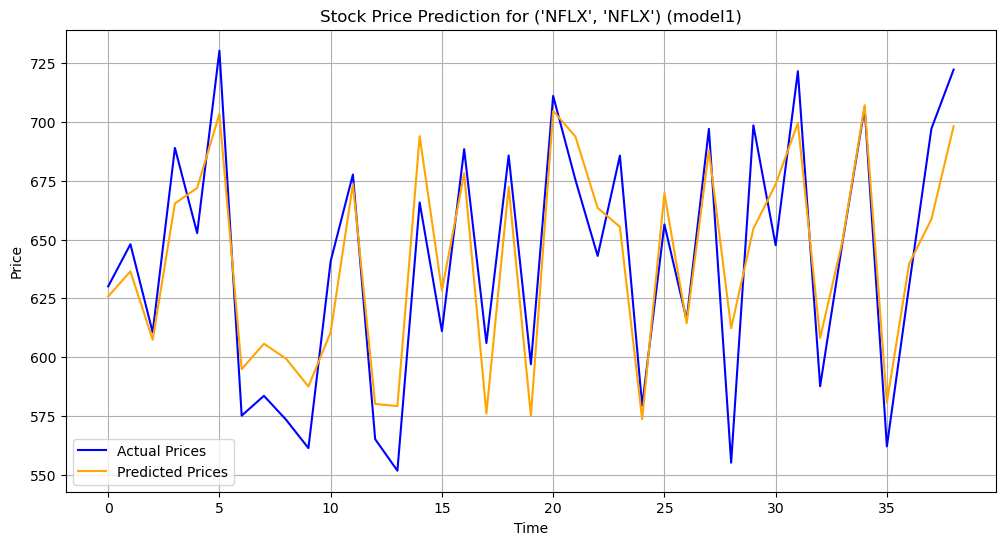

Training model2 for ('SPY', 'SPY')...
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - loss: 0.3257 - val_loss: 0.0918
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0451 - val_loss: 0.0484
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0326 - val_loss: 0.0223
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0177 - val_loss: 0.0103
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0102 - val_loss: 0.0055
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0065 - val_loss: 0.0067
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0053 - val_loss: 0.0076
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0060 - val_loss: 0.0064
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046 - val_loss: 0.0057
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━

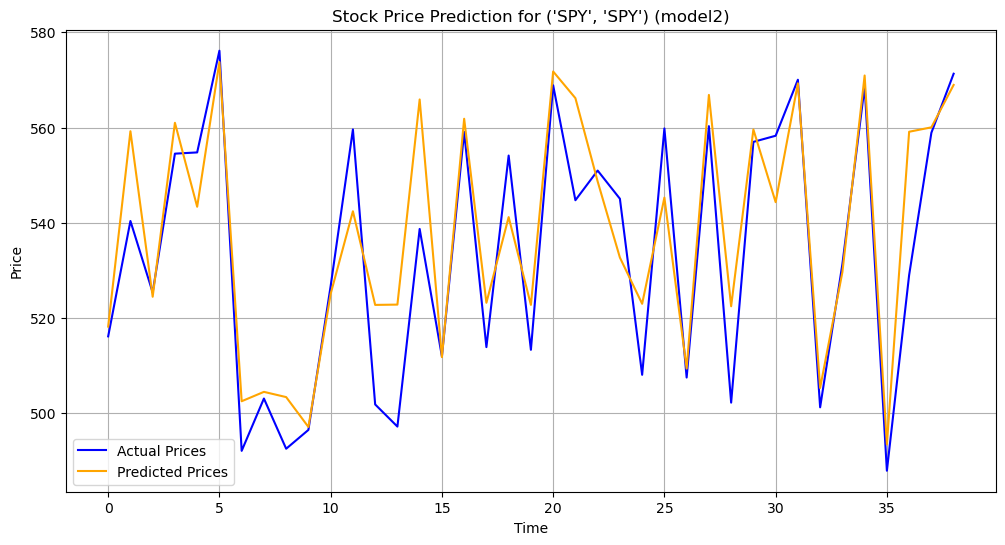


Stored Models:
model1
model2


In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Attention
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Attention, Input, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
# Initialize scalers and data dictionaries
scalers = {}
X_dict, y_dict = {}, {}
models = {}  # Dictionary to store models

# Load and preprocess the data
def prepare_data(price_data, look_back=60):
    """
    Prepares the data for training and testing.
    """
    for symbol in price_data.columns:  # Assuming price_data has separate columns for each symbol
        scalers[symbol] = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scalers[symbol].fit_transform(price_data[symbol].values.reshape(-1, 1))
    
        X, y = [], []
        for i in range(len(scaled_data) - look_back):
            X.append(scaled_data[i:i+look_back])
            y.append(scaled_data[i+look_back, 0])  # Predicting the next 'Adj Close' value
    
        X_dict[symbol] = np.array(X)
        y_dict[symbol] = np.array(y)
     
    return X_dict, y_dict

# Prepare the dataset
look_back = 60  # Increased look-back period to capture more context
X_dict, y_dict = prepare_data(price_data, look_back)

# Train and evaluate the model for each symbol
results = {}
model_count = 1  # Counter for model names

for symbol in X_dict.keys():
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_dict[symbol], y_dict[symbol], test_size=0.2, random_state=42)

    # Define the model architecture
    inputs = Input(shape=(look_back, X_train.shape[2]))  # Input layer
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)

    # Add Bidirectional LSTM layer
    lstm_output = Bidirectional(LSTM(100, return_sequences=True))(x)

    # Add Attention mechanism
    attention_output = Attention()([lstm_output, lstm_output])  # Query and Value are the same here
    concatenated = Concatenate()([lstm_output, attention_output])  # Combine LSTM and attention outputs

    # Additional LSTM layer and Dense layers
    x = Bidirectional(LSTM(100, return_sequences=False))(concatenated)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)  # Output layer

    # Compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')

    # Dynamically name the model and store it in the dictionary
    model_name = f"model{model_count}"
    models[model_name] = model  # Store the model
    model_count += 1

    # Train the model
    print(f"Training {model_name} for {symbol}...")
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

    # Make predictions
    predicted = model.predict(X_test)
    # Use the correct scaler for the current symbol
    predicted_prices = scalers[symbol].inverse_transform(predicted.reshape(-1, 1))

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f"Test Loss for {symbol} ({model_name}): {loss}")

    # Store results for plotting
    actual_prices = scalers[symbol].inverse_transform(y_test.reshape(-1, 1))
    results[symbol] = (actual_prices, predicted_prices)

    # Plot actual vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label='Actual Prices', color='blue')
    plt.plot(predicted_prices, label='Predicted Prices', color='orange')
    plt.title(f'Stock Price Prediction for {symbol} ({model_name})')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Print all models stored
print("\nStored Models:")
for model_name, model in models.items():
    print(model_name)

Training model1 for ('AMZN', 'AMZN')...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0947 - val_loss: 0.0140
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0156 - val_loss: 0.0128
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - val_loss: 0.0126
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0119 - val_loss: 0.0141
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0119 - val_loss: 0.0098
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0086 - val_loss: 0.0119
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0076 - val_loss: 0.0090
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0089 - val_loss: 0.0069
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 12/100

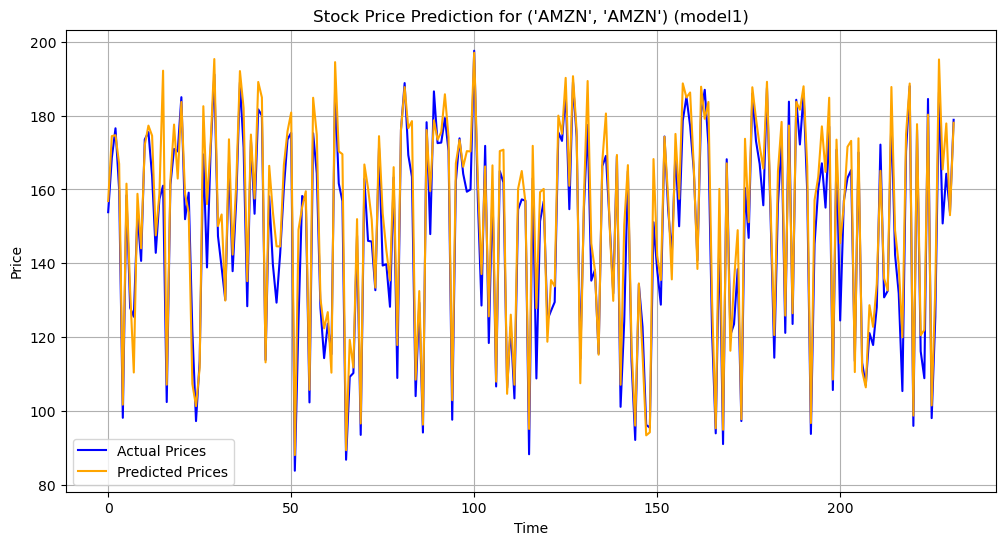

Training model2 for ('GOOG', 'GOOG')...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0691 - val_loss: 0.0039
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0071 - val_loss: 0.0037
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0055 - val_loss: 0.0041
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0060 - val_loss: 0.0041
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0064 - val_loss: 0.0030
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0040 - val_loss: 0.0025
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0036 - val_loss: 0.0062
Epoch 12/100

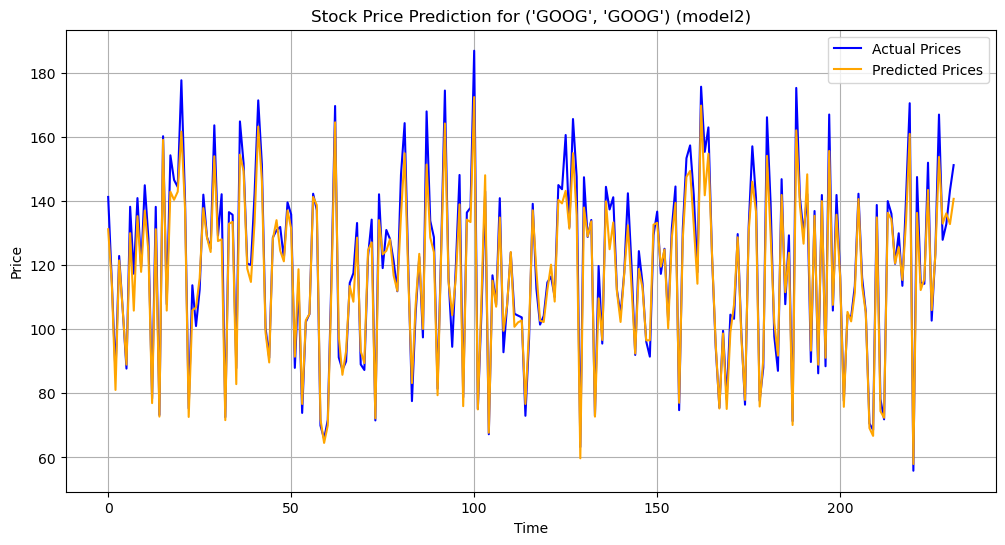


Stored Models:
model1
model2


In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Attention, Input, Concatenate, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Initialize scalers and data dictionaries
scalers = {}
X_dict, y_dict = {}, {}
models = {}  # Dictionary to store models

# Load and preprocess the data
def prepare_data(price_data, look_back=60):
    """
    Prepares the data for training and testing.
    """
    for symbol in price_data.columns:  # Assuming price_data has separate columns for each symbol
        scalers[symbol] = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scalers[symbol].fit_transform(price_data[symbol].values.reshape(-1, 1))
    
        X, y = [], []
        for i in range(len(scaled_data) - look_back):
            X.append(scaled_data[i:i+look_back])
            y.append(scaled_data[i+look_back, 0])  # Predicting the next 'Adj Close' value
    
        X_dict[symbol] = np.array(X)
        y_dict[symbol] = np.array(y)
     
    return X_dict, y_dict

# Prepare the dataset
look_back = 60  # Increased look-back period to capture more context
X_dict, y_dict = prepare_data(price_data, look_back)

# Train and evaluate the model for each symbol
results = {}
model_count = 1  # Counter for model names

for symbol in X_dict.keys():
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_dict[symbol], y_dict[symbol], test_size=0.2, random_state=42)

    # Define the model architecture
    inputs = Input(shape=(look_back, X_train.shape[2]))  # Input layer
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)

    # Add LSTM layer
    lstm_output = LSTM(100, return_sequences=True)(x)

    # Add Attention mechanism
    attention_output = Attention()([lstm_output, lstm_output])  # Query and Value are the same here
    concatenated = Concatenate()([lstm_output, attention_output])  # Combine LSTM and attention outputs

    # Additional LSTM layer and Dense layers
    x = LSTM(100, return_sequences=False)(concatenated)
    x = Dropout(0.3)(x)  # Add dropout for regularization
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)  # Output layer

    # Compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Dynamically name the model and store it in the dictionary
    model_name = f"model{model_count}"
    models[model_name] = model  # Store the model
    model_count += 1

    # Train the model
    print(f"Training {model_name} for {symbol}...")
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

    # Make predictions
    predicted = model.predict(X_test)
    # Use the correct scaler for the current symbol
    predicted_prices = scalers[symbol].inverse_transform(predicted.reshape(-1, 1))

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f"Test Loss for {symbol} ({model_name}): {loss}")

    # Store results for plotting
    actual_prices = scalers[symbol].inverse_transform(y_test.reshape(-1, 1))
    results[symbol] = (actual_prices, predicted_prices)

    # Plot actual vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label='Actual Prices', color='blue')
    plt.plot(predicted_prices, label='Predicted Prices', color='orange')
    plt.title(f'Stock Price Prediction for {symbol} ({model_name})')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Print all models stored
print("\nStored Models:")
for model_name, model in models.items():
    print(model_name)


Training model for ('AAPL', 'AAPL')...
Epoch 1/100


c:\Users\biswa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.3556 - val_loss: 0.1638
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1101 - val_loss: 0.0543
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0537 - val_loss: 0.0200
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0206 - val_loss: 0.0326
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0197 - val_loss: 0.0139
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0155 - val_loss: 0.0130
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0152 - val_loss: 0.0127
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0116 - val_loss: 0.0122
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0098 - val_loss: 0.0094
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - val_loss: 0.0096
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - val_loss: 0.0096
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0068 - val_loss: 0.0080
E

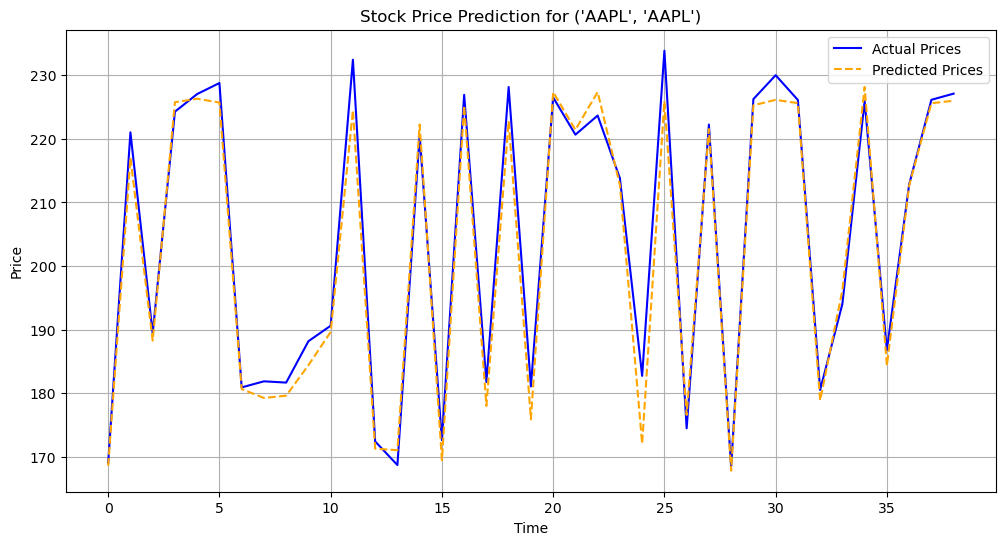

Training model for ('XLC', 'XLC')...
Epoch 1/100


c:\Users\biswa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.3156 - val_loss: 0.0030
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0270 - val_loss: 0.0059
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0078 - val_loss: 0.0205
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0157 - val_loss: 0.0028
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0046 - val_loss: 0.0080
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0030 - val_loss: 0.0026
E

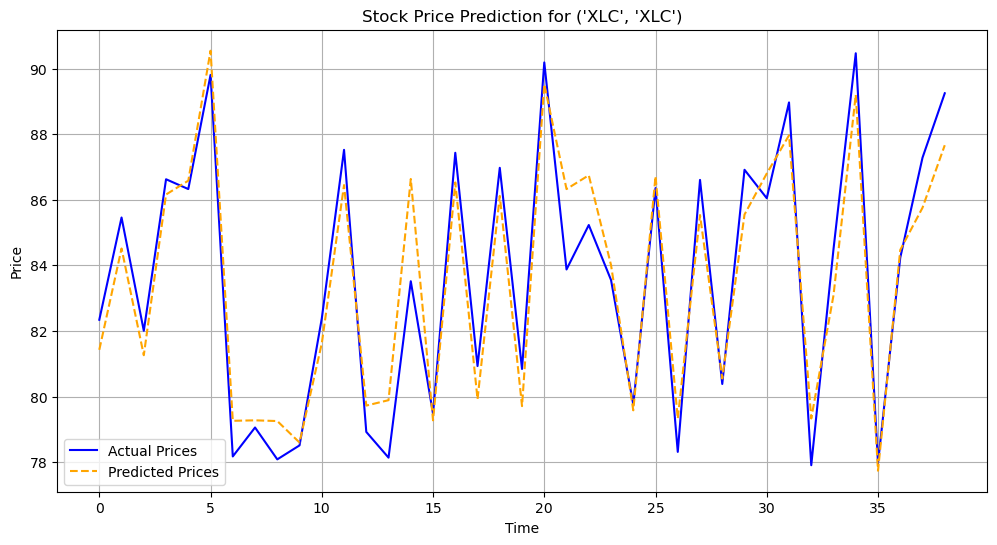


Stored Models:
('AAPL', 'AAPL'): <Sequential name=sequential_4, built=True>
('XLC', 'XLC'): <Sequential name=sequential_5, built=True>


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Initialize scalers and data dictionaries
scalers = {}
X_dict, y_dict = {}, {}
models = {}  # Dictionary to store models for each symbol

# Load and preprocess the data
def prepare_data(price_data, look_back=60):
    """
    Prepares the data for training and testing.
    """
    for symbol in price_data.columns:  # Assuming price_data has separate columns for each symbol
        scalers[symbol] = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scalers[symbol].fit_transform(price_data[symbol].values.reshape(-1, 1))
    
        X, y = [], []
        for i in range(len(scaled_data) - look_back):
            X.append(scaled_data[i:i+look_back])
            y.append(scaled_data[i+look_back, 0])  # Predicting the next 'Adj Close' value
    
        X_dict[symbol] = np.array(X)
        y_dict[symbol] = np.array(y)
     
    return X_dict, y_dict

# Prepare the dataset
look_back = 60
X_dict, y_dict = prepare_data(price_data, look_back)

# Train and evaluate the model for each symbol
results = {}
for symbol in X_dict.keys():
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_dict[symbol], y_dict[symbol], test_size=0.2, random_state=42)

    # Define the simplified CNN-LSTM model
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(look_back, X_train.shape[2])),
        MaxPooling1D(pool_size=2),
        LSTM(100, return_sequences=False),  # Single LSTM layer
        Dense(64, activation='relu'),
        Dense(1, activation='linear')  # Output layer
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Train the model
    print(f"Training model for {symbol}...")
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

    # Store the trained model in the dictionary
    models[symbol] = model

    # Make predictions
    predicted = model.predict(X_test)
    predicted_prices = scalers[symbol].inverse_transform(predicted.reshape(-1, 1))

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f"Test Loss for {symbol}: {loss}")

    # Store results for plotting
    actual_prices = scalers[symbol].inverse_transform(y_test.reshape(-1, 1))
    results[symbol] = (actual_prices, predicted_prices)

    # Plot actual vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label='Actual Prices', color='blue')
    plt.plot(predicted_prices, label='Predicted Prices', color='orange', linestyle='--')
    plt.title(f'Stock Price Prediction for {symbol}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Print stored models
print("\nStored Models:")
for symbol, model in models.items():
    print(f"{symbol}: {model}")


Mean Squared Error for ('NFLX', 'NFLX'): 8895.154271006106


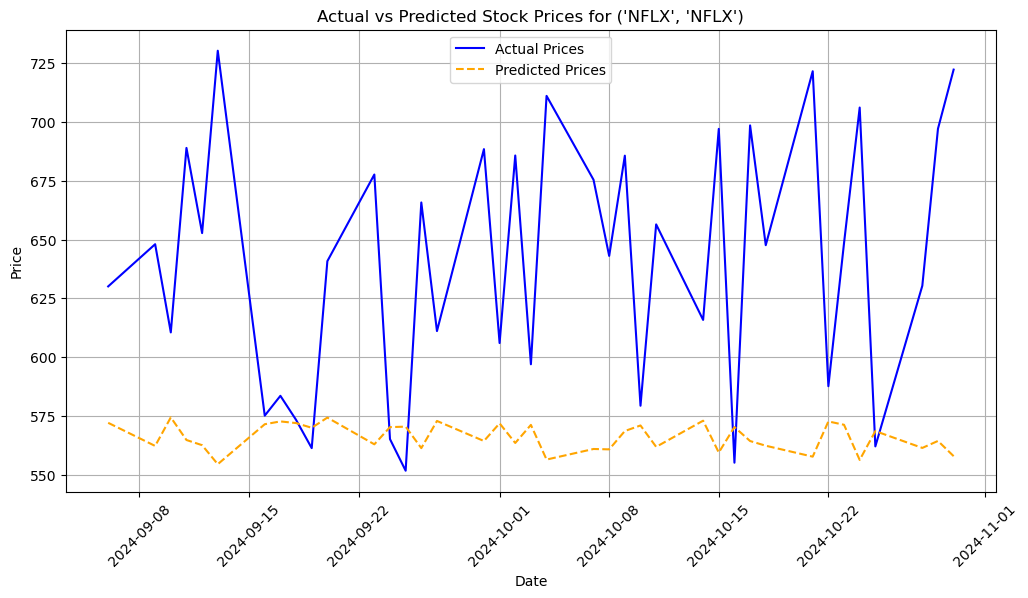

Mean Squared Error for ('SPY', 'SPY'): 980.0671280426666


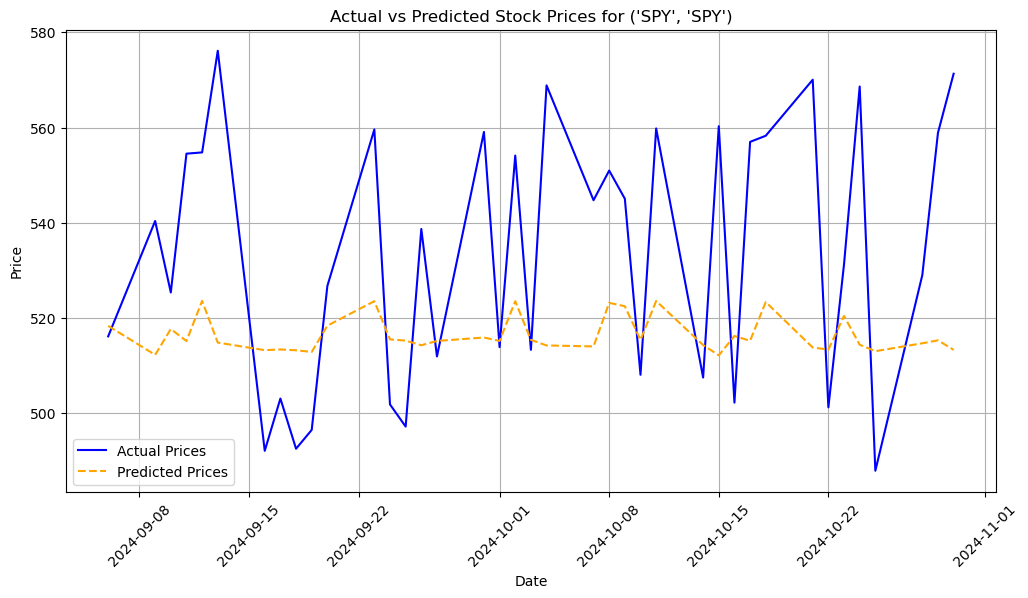


MSE Results:
('NFLX', 'NFLX'): 8895.154271006106
('SPY', 'SPY'): 980.0671280426666

Average MSE across all symbols: 4937.610699524386


In [8]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Store MSE values for each symbol
mse_results = {}

# Loop through results for each symbol
for symbol, result in results.items():
    actual_prices = result[0]  # Assuming the first element is the actual prices
    predicted_prices = result[1]  # Assuming the second element is the predicted prices
    dates = price_data.index[-len(actual_prices):]  # Extract corresponding dates

    # Calculate MSE for the current symbol
    mse = mean_squared_error(actual_prices, predicted_prices)
    mse_results[symbol] = mse
    print(f"Mean Squared Error for {symbol}: {mse}")
    
    # Plot actual vs predicted prices with dates on the x-axis
    plt.figure(figsize=(12, 6))
    plt.plot(dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(dates, predicted_prices, label='Predicted Prices', color='orange', linestyle='--')
    plt.title(f'Actual vs Predicted Stock Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Print MSE results for all symbols
print("\nMSE Results:")
for symbol, mse in mse_results.items():
    print(f"{symbol}: {mse}")

# Optionally calculate the average MSE across all symbols
average_mse = sum(mse_results.values()) / len(mse_results)
print(f"\nAverage MSE across all symbols: {average_mse}")


In [12]:
results[0]

KeyError: 0

Mean Squared Error for ('NFLX', 'NFLX'): 512.720641483099


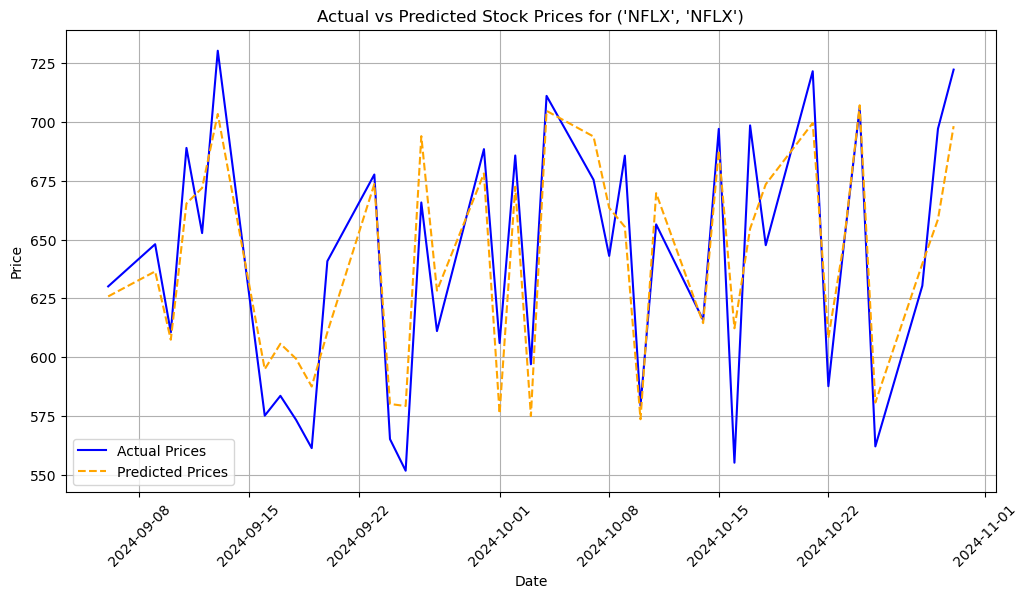

Mean Squared Error for ('SPY', 'SPY'): 152.05859468712538


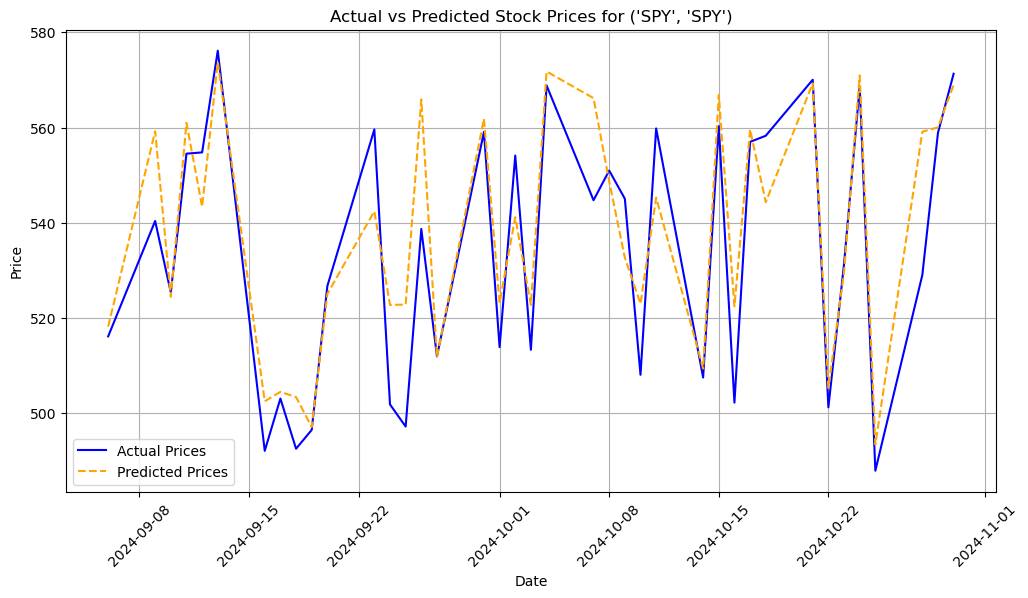


MSE Results:
('NFLX', 'NFLX'): 512.720641483099
('SPY', 'SPY'): 152.05859468712538

Average MSE across all symbols: 332.3896180851122


In [6]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Store MSE values for each symbol
mse_results = {}

# Loop through results for each symbol
for symbol, result in results.items():
    actual_prices = result[0]  # Assuming the first element is the actual prices
    predicted_prices = result[1]  # Assuming the second element is the predicted prices
    dates = price_data.index[-len(actual_prices):]  # Extract corresponding dates

    # Calculate MSE for the current symbol
    mse = mean_squared_error(actual_prices, predicted_prices)
    mse_results[symbol] = mse
    print(f"Mean Squared Error for {symbol}: {mse}")
    
    # Plot actual vs predicted prices with dates on the x-axis
    plt.figure(figsize=(12, 6))
    plt.plot(dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(dates, predicted_prices, label='Predicted Prices', color='orange', linestyle='--')
    plt.title(f'Actual vs Predicted Stock Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Print MSE results for all symbols
print("\nMSE Results:")
for symbol, mse in mse_results.items():
    print(f"{symbol}: {mse}")

# Optionally calculate the average MSE across all symbols
average_mse = sum(mse_results.values()) / len(mse_results)
print(f"\nAverage MSE across all symbols: {average_mse}")

In [ ]:
# import numpy as np
# from datetime import timedelta

# # Function to predict future prices
# def predict_future_prices(model, last_sequence, scaler, days_to_predict):
#     """
#     Predict future stock prices for a given number of days.
#     - model: Trained CNN-LSTM model.
#     - last_sequence: Last 'look_back' days of data as input.
#     - scaler: Scaler used to normalize the data.
#     - days_to_predict: Number of days to predict.
#     """
#     predictions = []
#     current_sequence = last_sequence.copy()

#     for _ in range(days_to_predict):
#         # Reshape the input sequence for the model
#         current_sequence_reshaped = current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1])
        
#         # Predict the next day's price
#         predicted_scaled = model.predict(current_sequence_reshaped)
#         predicted_price = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))[0, 0]
#         predictions.append(predicted_price)
        
#         # Update the sequence: Remove the oldest value and add the new prediction
#         new_row = np.append(current_sequence[1:], scaler.transform([[predicted_price]]), axis=0)
#         current_sequence = np.vstack([current_sequence[1:], new_row])

#     return predictions

# look_back=60
# # Get the last sequence from the data (e.g., last 30 days for look_back = 30)
# last_sequence = price_data.values[-look_back:]  # Replace 'price_data' with your DataFrame
# scaled_last_sequence = scaler.transform(last_sequence)

# # Predict stock prices for 1, 5, and 7 days
# days_to_predict = [1, 5, 7]
# future_predictions = {days: predict_future_prices(model, scaled_last_sequence, scaler, days) for days in days_to_predict}

# # Display the results
# for days, predictions in future_predictions.items():
#     print(f"Predicted prices for the next {days} days: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,2)

Training CNN-LSTM model for ('AAPL', 'AAPL')...
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.2094 - val_loss: 0.0421
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0456 - val_loss: 0.0445
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0408 - val_loss: 0.0371
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0354 - val_loss: 0.0381
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0316 - val_loss: 0.0304
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0292 - val_loss: 0.0294
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0191 - val_loss: 0.0219
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - val_loss: 0.0155
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - val_loss: 0.0187
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0118 - val_loss: 0.0202
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - val_loss: 0.0089
Epoch 12/200
5/5 ━━━━━━━━

c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

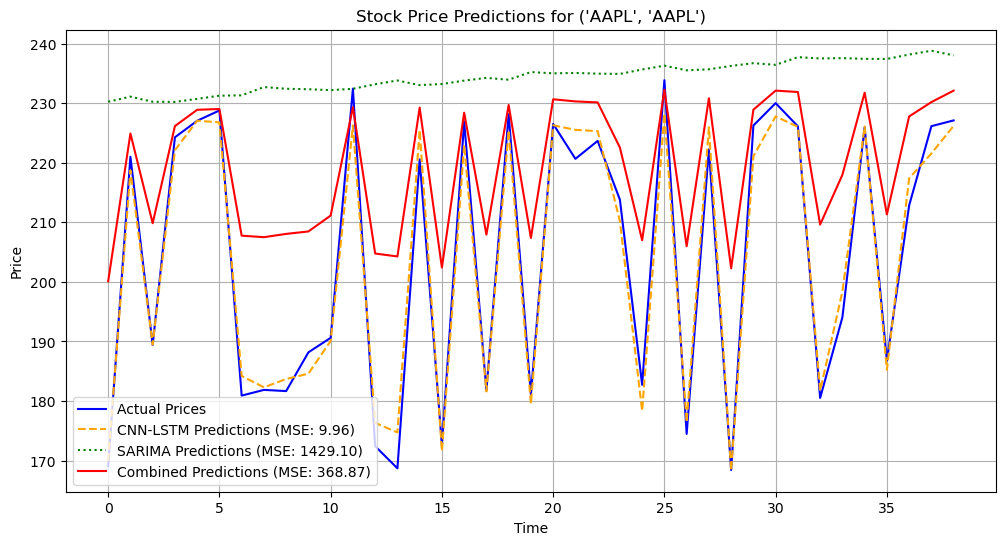

Training CNN-LSTM model for ('XLC', 'XLC')...
Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.2757 - val_loss: 0.0118
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0181 - val_loss: 0.0077
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0112 - val_loss: 0.0055
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0084 - val_loss: 0.0089
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0073 - val_loss: 0.0092
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0068 - val_loss: 0.0079
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - val_loss: 0.0048
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 12/200
5/5 ━━━━━━━━━━

c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

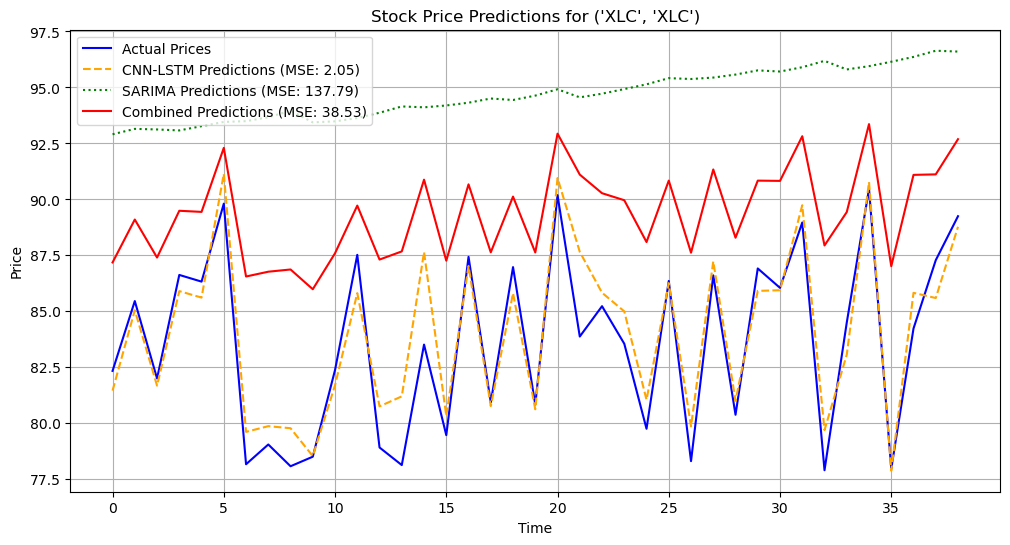


MSE Results:
('AAPL', 'AAPL'):
  cnn_lstm: 9.96
  sarima: 1429.10
  combined: 368.87
('XLC', 'XLC'):
  cnn_lstm: 2.05
  sarima: 137.79
  combined: 38.53


In [13]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Attention, Input, Concatenate, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Initialize scalers and data dictionaries
scalers = {}
X_dict, y_dict = {}, {}
models = {}  # Dictionary to store CNN-LSTM models

# Load and preprocess the data
def prepare_data(price_data, look_back=30):
    for symbol in price_data.columns:  # Assuming price_data has separate columns for each symbol
        scalers[symbol] = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scalers[symbol].fit_transform(price_data[symbol].values.reshape(-1, 1))
        X, y = [], []
        for i in range(len(scaled_data) - look_back):
            X.append(scaled_data[i:i+look_back])
            y.append(scaled_data[i+look_back, 0])  # Predicting the next 'Adj Close' value
        X_dict[symbol] = np.array(X)
        y_dict[symbol] = np.array(y)
    return X_dict, y_dict

# Prepare the dataset
look_back = 60
X_dict, y_dict = prepare_data(price_data, look_back)

# Train and evaluate the models for each symbol
results = {}
model_count = 1  # Counter for model names

for symbol in X_dict.keys():
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_dict[symbol], y_dict[symbol], test_size=0.2, random_state=42)

    # CNN-LSTM Model
    inputs = Input(shape=(look_back, X_train.shape[2]))
    x = Conv1D(64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    lstm_output = Bidirectional(LSTM(100, return_sequences=True))(x)
    attention_output = Attention()([lstm_output, lstm_output])
    concatenated = Concatenate()([lstm_output, attention_output])
    x = Bidirectional(LSTM(100, return_sequences=False))(concatenated)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Train the CNN-LSTM model
    print(f"Training CNN-LSTM model for {symbol}...")
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)
    models[f"model{model_count}"] = model
    model_count += 1

    # Predict using CNN-LSTM
    cnn_lstm_pred = model.predict(X_test)
    cnn_lstm_pred_prices = scalers[symbol].inverse_transform(cnn_lstm_pred.reshape(-1, 1))

    # SARIMA Model
    print(f"Training SARIMA model for {symbol}...")
    sarima_model = SARIMAX(
        price_data[symbol], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False
    )
    sarima_results = sarima_model.fit(disp=False)
    sarima_pred = sarima_results.get_forecast(steps=len(X_test)).predicted_mean.values

    # Combine CNN-LSTM and SARIMA predictions
    combined_pred = 0.5 * cnn_lstm_pred_prices + 0.5 * sarima_pred.reshape(-1, 1)

    # Evaluate and store results
    actual_prices = scalers[symbol].inverse_transform(y_test.reshape(-1, 1))
    mse_cnn_lstm = mean_squared_error(actual_prices, cnn_lstm_pred_prices)
    mse_sarima = mean_squared_error(actual_prices, sarima_pred)
    mse_combined = mean_squared_error(actual_prices, combined_pred)

    results[symbol] = {
        "actual": actual_prices,
        "cnn_lstm": cnn_lstm_pred_prices,
        "sarima": sarima_pred,
        "combined": combined_pred,
        "mse": {
            "cnn_lstm": mse_cnn_lstm,
            "sarima": mse_sarima,
            "combined": mse_combined,
        },
    }

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label="Actual Prices", color="blue")
    plt.plot(cnn_lstm_pred_prices, label=f"CNN-LSTM Predictions (MSE: {mse_cnn_lstm:.2f})", color="orange", linestyle="--")
    plt.plot(sarima_pred, label=f"SARIMA Predictions (MSE: {mse_sarima:.2f})", color="green", linestyle=":")
    plt.plot(combined_pred, label=f"Combined Predictions (MSE: {mse_combined:.2f})", color="red", linestyle="-")
    plt.title(f"Stock Price Predictions for {symbol}")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

# Print MSE for all symbols
print("\nMSE Results:")
for symbol, result in results.items():
    print(f"{symbol}:")
    for model_type, mse in result["mse"].items():
        print(f"  {model_type}: {mse:.2f}")


In [4]:
import numpy as np
from datetime import timedelta

look_back = 60

# Function to predict future prices
def predict_future_prices(model, last_sequence, scaler, days_to_predict):
    """
    Predict future stock prices for a given number of days.
    - model: Trained CNN-LSTM model.
    - last_sequence: Last 'look_back' days of data as input.
    - scaler: Scaler used to normalize the data.
    - days_to_predict: Number of days to predict.
    """
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        # Reshape the input sequence for the model
        current_sequence_reshaped = current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1])
        
        # Predict the next day's price
        predicted_scaled = model.predict(current_sequence_reshaped)
        predicted_price = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))[0, 0]
        predictions.append(predicted_price)
        
        # Update the sequence: Remove the oldest value and add the new prediction
        new_row = scaler.transform([[predicted_price]])
        current_sequence = np.vstack([current_sequence[1:], new_row])

    return predictions

# Function to generate future dates excluding weekends
def generate_future_dates(start_date, num_days):
    """
    Generate future dates excluding weekends.
    """
    dates = []
    current_date = start_date
    while len(dates) < num_days:
        current_date += timedelta(days=1)
        if current_date.weekday() < 5:  # Monday to Friday (0-4 are weekdays)
            dates.append(current_date)
    return dates

# Predict future prices for multiple models and symbols
days_to_predict = [1, 5, 7, 10]
future_predictions_by_symbol = {}

for symbol, model_name in zip(X_dict.keys(), models.keys()):
    # Get the last sequence for the current symbol
    last_sequence = price_data[symbol].values[-look_back:]
    scaled_last_sequence = scalers[symbol].transform(last_sequence.reshape(-1, 1))
    
    # Get the last date in the dataset
    last_date = price_data.index[-1]
    
    # Predict for the current model and symbol
    predictions = {}
    for days in days_to_predict:
        future_dates = generate_future_dates(last_date, days)
        predicted_prices = predict_future_prices(models[model_name], scaled_last_sequence, scalers[symbol], days)
        predictions[days] = {date.strftime('%Y-%m-%d'): price for date, price in zip(future_dates, predicted_prices)}
    
    future_predictions_by_symbol[symbol] = predictions

# Display the predictions for each symbol
for symbol, predictions in future_predictions_by_symbol.items():
    print(f"Predictions for {symbol}:")
    for days, date_price_mapping in predictions.items():
        print(f"  Next {days} days:")
        for date, price in date_price_mapping.items():
            print(f"    {date}: {price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

In [8]:
print(models.keys())  # Check if the models are stored correctly


dict_keys([])


In [10]:
future_predictions_by_symbol

{}

In [ ]:
from datetime import timedelta

# Function to predict future prices
def predict_future_prices_combined(model, last_sequence, scaler, sarima_model, steps=10):
    """
    Predict future stock prices for the next 'steps' days using the combined CNN-LSTM and SARIMA models.
    """
    cnn_lstm_predictions = []
    sarima_predictions = sarima_model.get_forecast(steps=steps).predicted_mean.values

    current_sequence = last_sequence.copy()
    for _ in range(steps):
        # Reshape the input sequence for the CNN-LSTM model
        current_sequence_reshaped = current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1])
        
        # CNN-LSTM Prediction
        predicted_scaled = model.predict(current_sequence_reshaped)
        predicted_price = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))[0, 0]
        cnn_lstm_predictions.append(predicted_price)
        
        # Update the sequence for the next prediction
        new_row = scaler.transform([[predicted_price]])
        current_sequence = np.vstack([current_sequence[1:], new_row])

    # Combine CNN-LSTM and SARIMA predictions
    combined_predictions = [
        0.5 * cnn_lstm + 0.5 * sarima for cnn_lstm, sarima in zip(cnn_lstm_predictions, sarima_predictions)
    ]

    return combined_predictions

# Predict for the next 10 days
future_predictions_by_symbol = {}

for symbol, model_name in zip(X_dict.keys(), models.keys()):
    # Get the last sequence for CNN-LSTM
    last_sequence = X_dict[symbol][-1]
    scaled_last_sequence = scalers[symbol].transform(last_sequence)
    
    # Use the stored SARIMA model and CNN-LSTM model
    cnn_lstm_model = models[model_name]
    sarima_model = SARIMAX(
        price_data[symbol], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False
    ).fit(disp=False)
    
    # Predict future prices
    predictions = predict_future_prices_combined(
        cnn_lstm_model, scaled_last_sequence, scalers[symbol], sarima_model, steps=10
    )
    future_predictions_by_symbol[symbol] = predictions

# Display the predictions for each symbol
for symbol, predictions in future_predictions_by_symbol.items():
    print(f"Future Predictions for {symbol}:")
    for day, price in enumerate(predictions, start=1):
        print(f"Day {day}: {price:.2f}")


c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\biswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Future Predictions for ('XLC', 'XLC'):
Day 1: 101.49
Day 2: 101.61
Day 3: 101.59
Day 4: 102.09
Day 5: 102.49
Day 6: 103.18
Day 7: 103.26
Day 8: 104.21
Day 9: 104.25
Day 10: 104.87
Future Predictions for ('XLK', 'XLK'):
Day 1: 217.40
Day 2: 217.29
Day 3: 217.14
Day 4: 218.51
Day 5: 218.64
Day 6: 219.76
Day 7: 219.72
Day 8: 222.29
Day 9: 222.49
Day 10: 224.31


Mean Squared Error for ('AAPL', 'AAPL'): 11.412127151249502


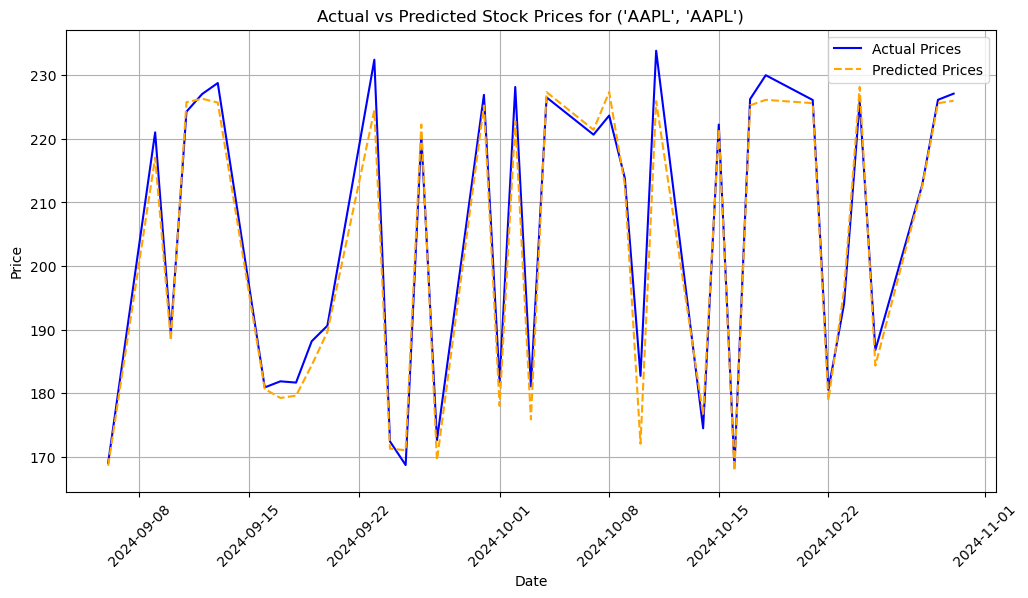

Showing candlestick chart for ('AAPL', 'AAPL')...


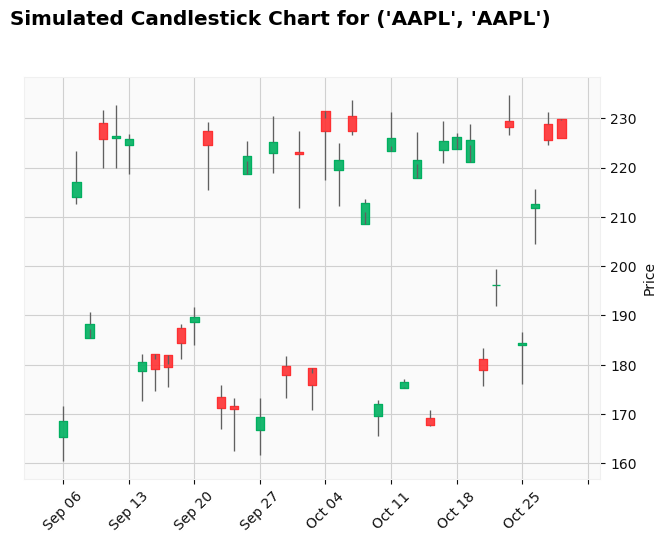

Mean Squared Error for ('XLC', 'XLC'): 1.2855591361593002


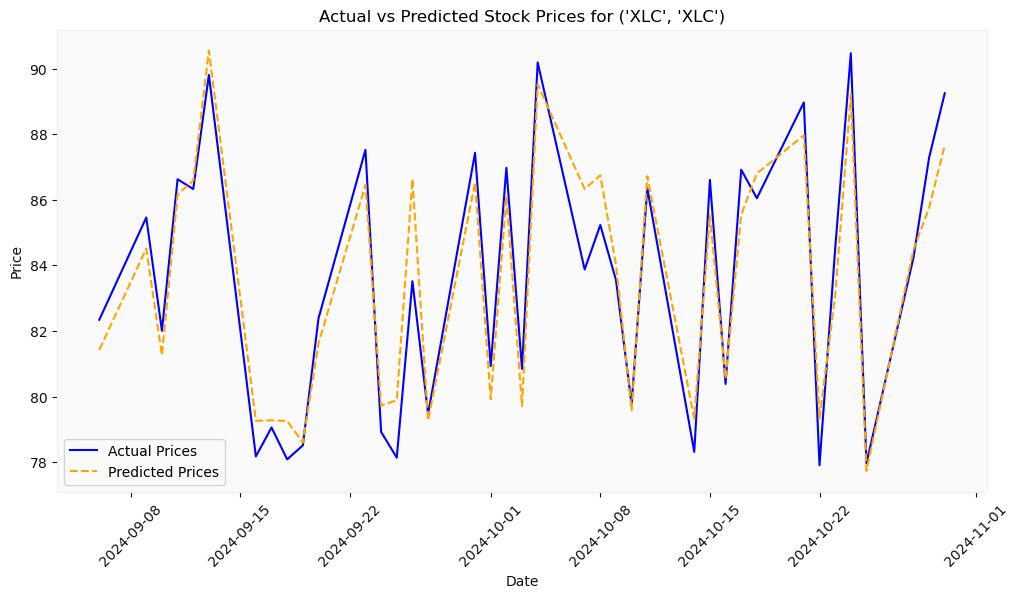

Showing candlestick chart for ('XLC', 'XLC')...


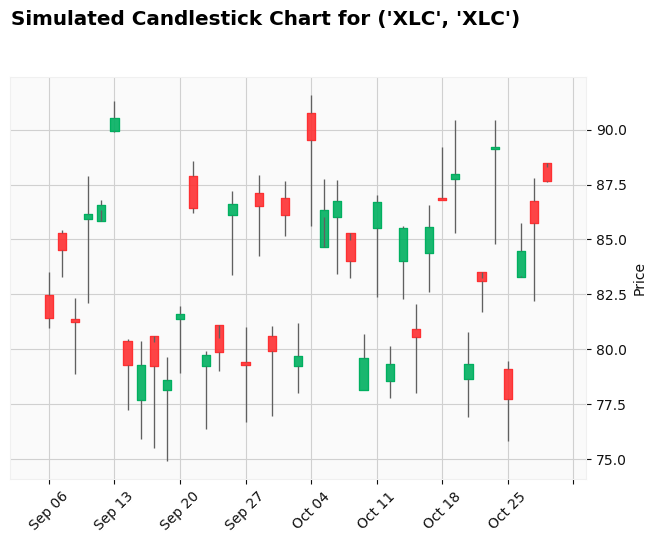


MSE Results:
('AAPL', 'AAPL'): 11.412127151249502
('XLC', 'XLC'): 1.2855591361593002

Average MSE across all symbols: 6.348843143704401


In [13]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import numpy as np

# Simulate OHLC data based on predicted closing prices
def simulate_ohlc(predicted_prices):
    """
    Simulate OHLC data based on predicted closing prices.
    - predicted_prices: 1D array of predicted closing prices.
    Returns: DataFrame with Open, High, Low, and Close.
    """
    predicted_prices = predicted_prices.flatten()  # Ensure 1D array
    simulated_ohlc = pd.DataFrame({
        "Open": predicted_prices * np.random.uniform(0.98, 1.02, size=len(predicted_prices)),  # Slight variation
        "High": predicted_prices * np.random.uniform(1.00, 1.03, size=len(predicted_prices)),  # Always >= close
        "Low": predicted_prices * np.random.uniform(0.95, 1.00, size=len(predicted_prices)),   # Always <= close
        "Close": predicted_prices
    })
    return simulated_ohlc

# Store MSE values for each symbol
mse_results = {}

# Loop through results for each symbol
for symbol, result in results.items():
    actual_prices = result[0]  # Assuming the first element is the actual prices
    predicted_prices = result[1]  # Assuming the second element is the predicted prices
    dates = price_data.index[-len(actual_prices):]  # Extract corresponding dates

    # Calculate MSE for the current symbol
    mse = mean_squared_error(actual_prices, predicted_prices)
    mse_results[symbol] = mse
    print(f"Mean Squared Error for {symbol}: {mse}")

    # Line Chart: Actual vs Predicted Prices
    plt.figure(figsize=(12, 6))
    plt.plot(dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(dates, predicted_prices, label='Predicted Prices', color='orange', linestyle='--')
    plt.title(f'Actual vs Predicted Stock Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    # Candlestick Chart
    print(f"Showing candlestick chart for {symbol}...")
    simulated_ohlc = simulate_ohlc(predicted_prices)  # Flattened in simulate_ohlc function
    simulated_ohlc.index = dates  # Set the dates as the index
    mpf.plot(simulated_ohlc, type='candle', title=f"Simulated Candlestick Chart for {symbol}", ylabel="Price", style="yahoo")

# Print MSE results for all symbols
print("\nMSE Results:")
for symbol, mse in mse_results.items():
    print(f"{symbol}: {mse}")

# Optionally calculate the average MSE across all symbols
average_mse = sum(mse_results.values()) / len(mse_results)
print(f"\nAverage MSE across all symbols: {average_mse}")


In [5]:
# Function to decide "Keep" or "Sell" based on predictions
def evaluate_stock_decision(predictions, current_price, drop_threshold=-0.05):
    """
    Decide whether to keep or sell a stock based on predictions.
    - predictions: List of predicted prices.
    - current_price: Current stock price.
    - drop_threshold: Maximum allowable drop percentage for keeping the stock.
    Returns:
    - Decision ("Keep" or "Sell") and Reason.
    """
    trend = "upward" if predictions[-1] > predictions[0] else "downward"
    avg_predicted_price = np.mean(predictions)
    max_drop = min(predictions) / current_price - 1

    if trend == "downward" or max_drop < drop_threshold:
        return "Sell", f"Predicted {trend} trend or price drop exceeds {drop_threshold*100}%."
    else:
        return "Keep", "Stable or upward trend with acceptable drop."

# Extend the prediction loop to include decisions
stock_decisions = {}

for symbol, predictions in future_predictions_by_symbol.items():
    print(f"Predictions for {symbol}:")
    stock_decisions[symbol] = {}

    for days, date_price_mapping in predictions.items():
        predicted_prices = list(date_price_mapping.values())
        current_price = price_data[symbol].iloc[-1]

        # Evaluate decision
        decision, reason = evaluate_stock_decision(predicted_prices, current_price)
        stock_decisions[symbol][days] = {"Decision": decision, "Reason": reason, "Predictions": date_price_mapping}

        print(f"  Next {days} days:")
        for date, price in date_price_mapping.items():
            print(f"    {date}: {price:.2f}")
        print(f"    Decision: {decision} - {reason}")

# Print summary of decisions
print("\nStock Decisions Summary:")
for symbol, decisions in stock_decisions.items():
    print(f"{symbol}:")
    for days, decision_info in decisions.items():
        print(f"  Next {days} days: {decision_info['Decision']} - {decision_info['Reason']}")


Predictions for ('NFLX', 'NFLX'):
  Next 1 days:
    2024-10-31: 754.79
    Decision: Sell - Predicted downward trend or price drop exceeds -5.0%.
  Next 5 days:
    2024-10-31: 754.79
    2024-11-01: 751.24
    2024-11-04: 754.72
    2024-11-05: 757.62
    2024-11-06: 757.51
    Decision: Keep - Stable or upward trend with acceptable drop.
  Next 7 days:
    2024-10-31: 754.79
    2024-11-01: 751.24
    2024-11-04: 754.72
    2024-11-05: 757.62
    2024-11-06: 757.51
    2024-11-07: 757.73
    2024-11-08: 759.84
    Decision: Keep - Stable or upward trend with acceptable drop.
  Next 10 days:
    2024-10-31: 754.79
    2024-11-01: 751.24
    2024-11-04: 754.72
    2024-11-05: 757.62
    2024-11-06: 757.51
    2024-11-07: 757.73
    2024-11-08: 759.84
    2024-11-11: 761.26
    2024-11-12: 760.57
    2024-11-13: 761.30
    Decision: Keep - Stable or upward trend with acceptable drop.
Predictions for ('SPY', 'SPY'):
  Next 1 days:
    2024-10-31: 585.83
    Decision: Sell - Predicted do

In [286]:
price_data

,AAPL,MSFT
Ticker,AAPL,MSFT
Date,,
2024-01-02,184.734985,368.117249
2024-01-03,183.351746,367.849243
2024-01-04,181.023178,365.209015
2024-01-05,180.296707,365.020386
2024-01-08,184.655365,371.908905
...,...,...
2024-11-22,229.869995,417.000000
2024-11-25,232.869995,418.790009


Training model for ('NFLX', 'NFLX')...
Epoch 1/200


c:\Users\biswa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.4477 - val_loss: 0.3143 - learning_rate: 0.0010
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1192 - val_loss: 0.2937 - learning_rate: 0.0010
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0808 - val_loss: 0.2599 - learning_rate: 0.0010
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0594 - val_loss: 0.2523 - learning_rate: 0.0010
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0532 - val_loss: 0.2390 - learning_rate: 0.0010
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0422 - val_loss: 0.2220 - learning_rate: 0.0010
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0445 - val_loss: 0.2262 - learning_rate: 0.0010
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0387 - val_loss: 0.2074 - learning_rate: 0.0010
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0407 - val_loss: 0.2084 - learning_rate: 0.0010
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

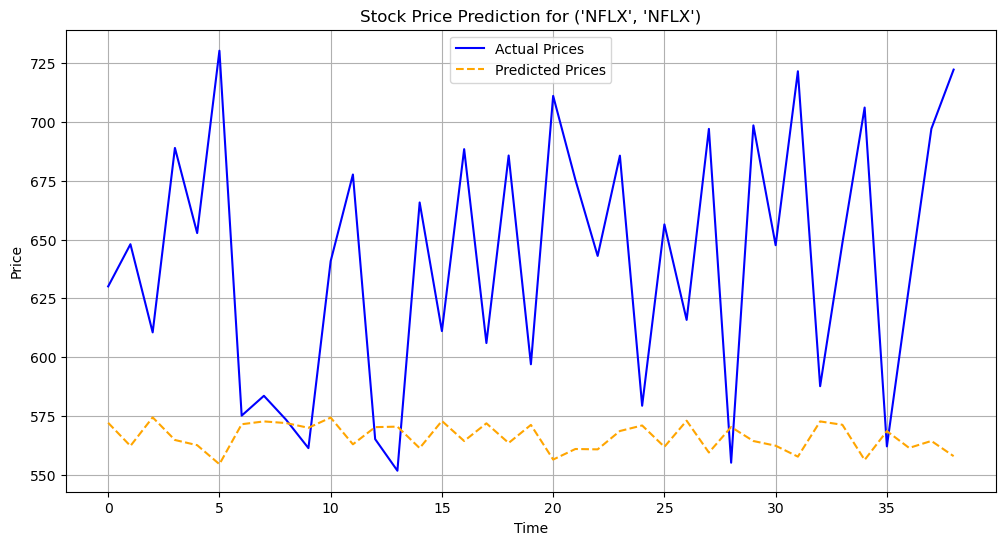

Training model for ('SPY', 'SPY')...
Epoch 1/200


c:\Users\biswa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - loss: 0.2732 - val_loss: 0.4758 - learning_rate: 0.0010
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0753 - val_loss: 0.4082 - learning_rate: 0.0010
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0512 - val_loss: 0.3860 - learning_rate: 0.0010
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0598 - val_loss: 0.3656 - learning_rate: 0.0010
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0378 - val_loss: 0.3491 - learning_rate: 0.0010
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0295 - val_loss: 0.3431 - learning_rate: 0.0010
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0271 - val_loss: 0.3210 - learning_rate: 0.0010
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0281 - val_loss: 0.2892 - learning_rate: 0.0010
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0335 - val_loss: 0.2836 - learning_rate: 0.0010
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

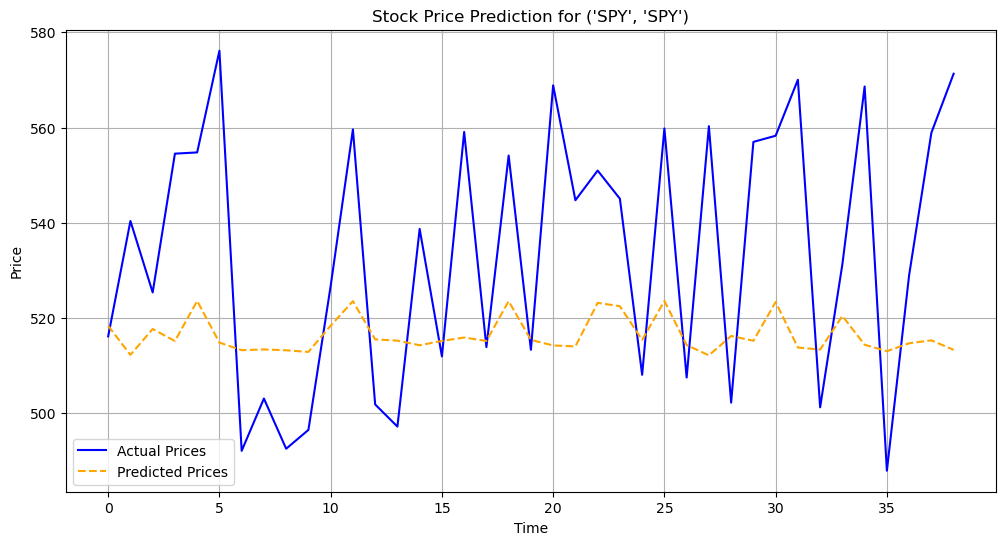


Stored Models:
('NFLX', 'NFLX'): <Sequential name=sequential, built=True>
('SPY', 'SPY'): <Sequential name=sequential_1, built=True>


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

# Initialize scalers and data dictionaries
scalers = {}
X_dict, y_dict = {}, {}
models = {}

# Load and preprocess the data
def prepare_data(price_data, look_back=60):
    """
    Prepares the data for training and testing.
    """
    for symbol in price_data.columns:
        scalers[symbol] = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scalers[symbol].fit_transform(price_data[symbol].values.reshape(-1, 1))
        X, y = [], []
        for i in range(len(scaled_data) - look_back):
            X.append(scaled_data[i:i + look_back])
            y.append(scaled_data[i + look_back, 0])
        X_dict[symbol] = np.array(X)
        y_dict[symbol] = np.array(y)
    return X_dict, y_dict

# Prepare the dataset
look_back = 60
X_dict, y_dict = prepare_data(price_data, look_back)

# Train and evaluate the model for each symbol
results = {}
for symbol in X_dict.keys():
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_dict[symbol], y_dict[symbol], test_size=0.2, random_state=42)

    # Define the optimized CNN-LSTM model
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(look_back, X_train.shape[2])),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        LSTM(100, return_sequences=False),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
    model_checkpoint = ModelCheckpoint(f"best_model_{symbol}.keras", save_best_only=True, monitor='val_loss', mode='min')

    # Train the model
    print(f"Training model for {symbol}...")
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32,
                        callbacks=[early_stopping, reduce_lr, model_checkpoint])

    # Store the trained model
    models[symbol] = model

    # Make predictions
    predicted = model.predict(X_test)
    predicted_prices = scalers[symbol].inverse_transform(predicted.reshape(-1, 1))

    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f"Test Loss for {symbol}: {loss}")

    # Store results for plotting
    actual_prices = scalers[symbol].inverse_transform(y_test.reshape(-1, 1))
    results[symbol] = (actual_prices, predicted_prices)

    # Plot actual vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label='Actual Prices', color='blue')
    plt.plot(predicted_prices, label='Predicted Prices', color='orange', linestyle='--')
    plt.title(f'Stock Price Prediction for {symbol}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Print stored models
print("\nStored Models:")
for symbol, model in models.items():
    print(f"{symbol}: {model}")
